<div style="border-radius: 10px; background-color: #4577D4; color:#ffffff; padding: 30px">

# Исследование: анализ данных о продаже компьютерных игр

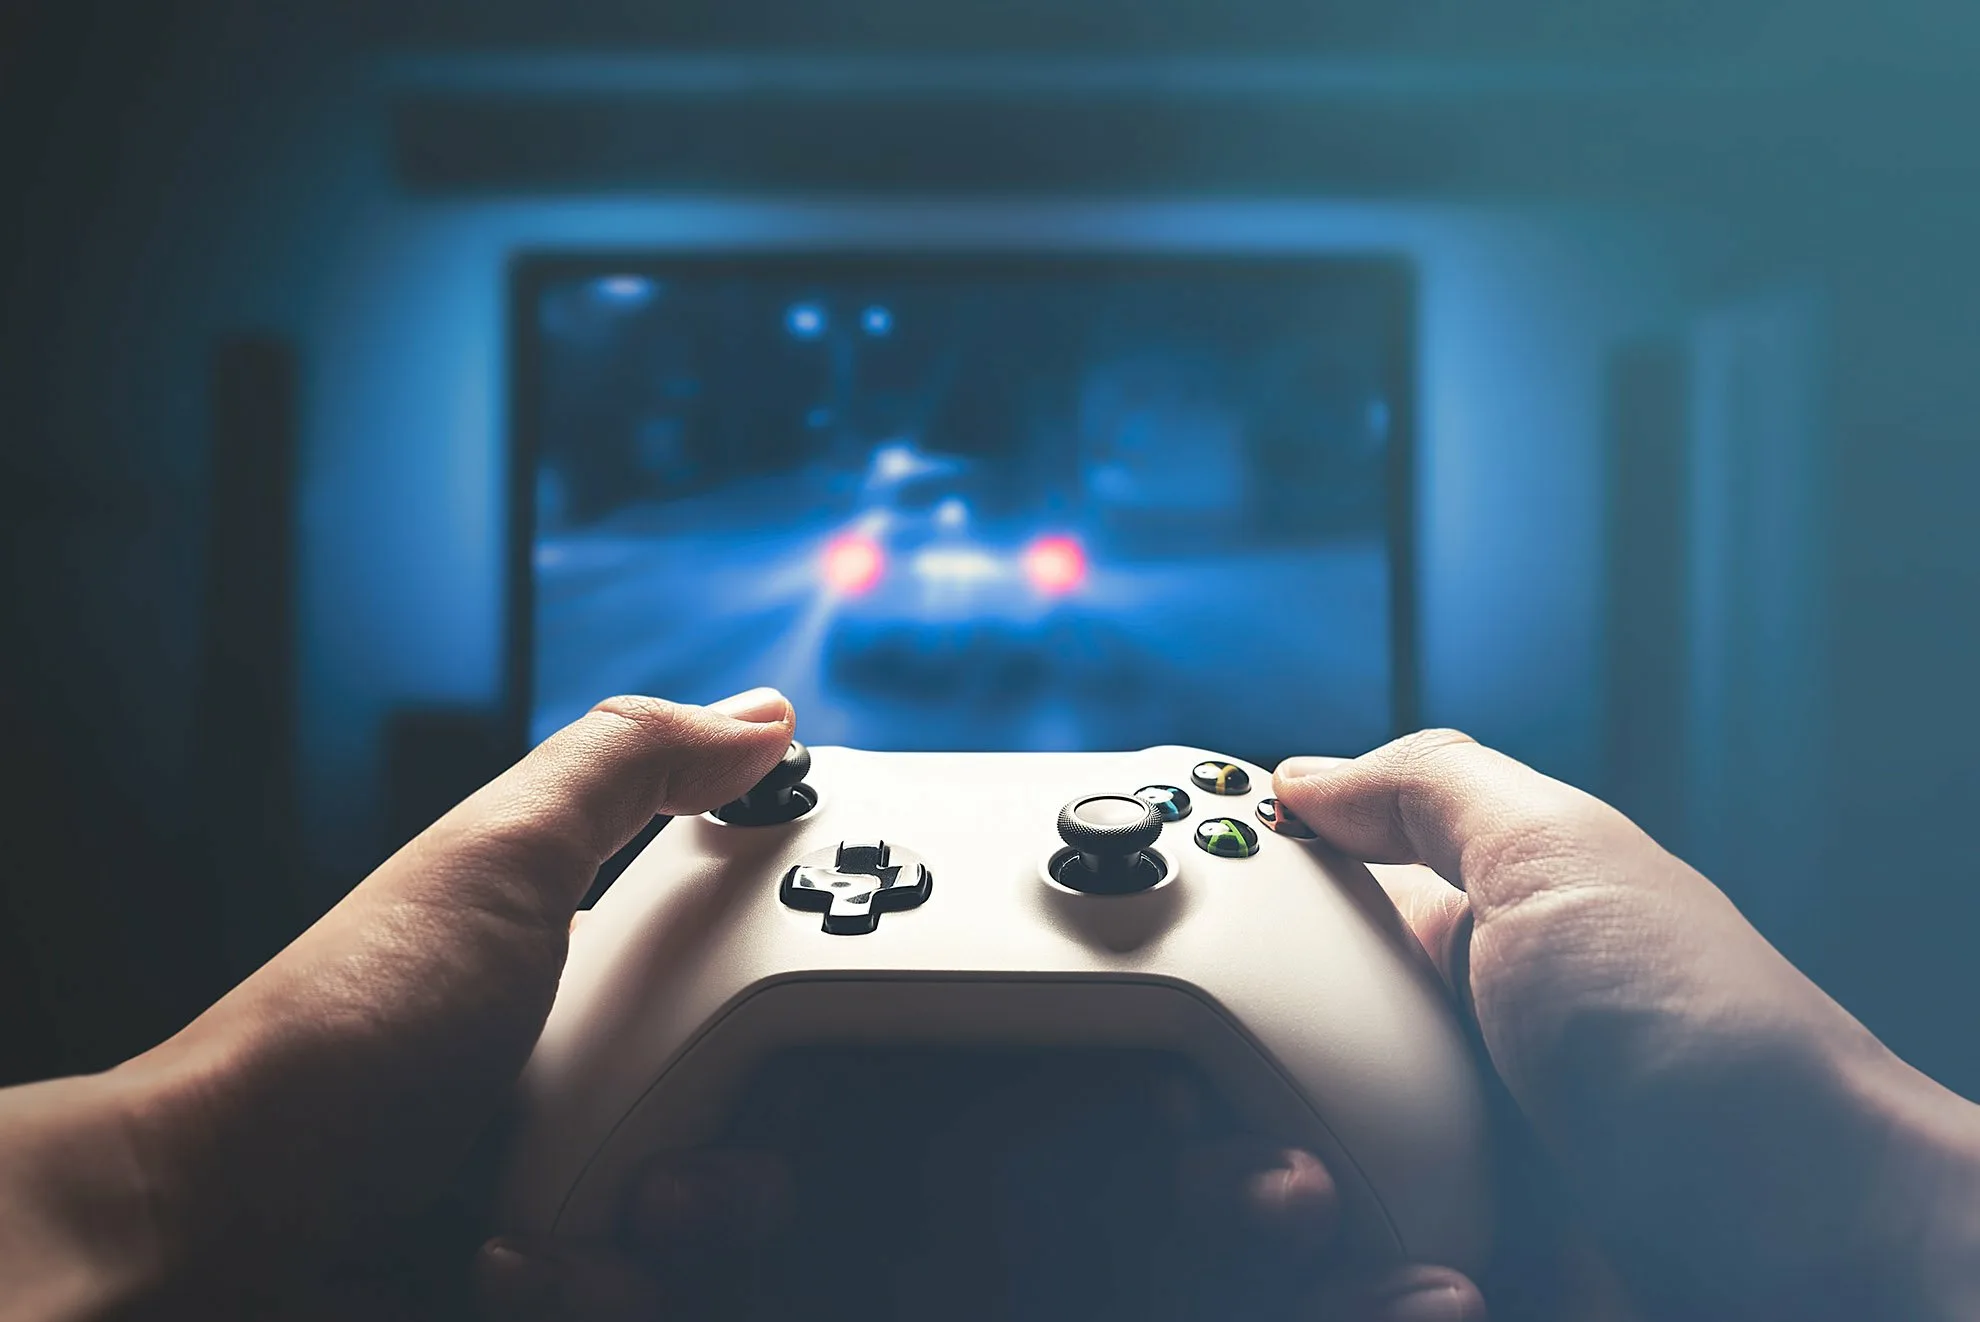

<div style="border: dashed 10px; background-color:#4577D4; color:#ffffff; padding: 20px">
        
Интернет-магазин "Стримчик" 🚀 планирует кампанию по продаже компьютерных игр на 2017-ый год. В распоряжении компании есть исторические данные о продажах за предыдущие года. На основе этих данных необходимо выявить закономерности, определяющие успешность игр. Результаты позволят спланировать рекламную кампанию на 2017-ый год.

**Цель исследования**: определить закономерности успешных игр.

**Задачи исследования**: исследовать данные, составить портрет пользователея по регионам и проверить интересующие гипотезы.

**План**:

1. Загрузка и обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Подведение итогов
7. Рекомендации

<div style="background-color: #FFE500; color:#000000; padding: 15px; border-radius: 10px;">

## Загрузка и обзор данных

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Загрузка данных

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [67]:
df = pd.read_csv('games.csv')
df.to_csv('games.csv', index=False)

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Обзор данных

In [68]:
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [69]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [70]:
display(df['Year_of_Release'].max())
df['Year_of_Release'].min()

2016.0

1980.0

In [71]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

<div style="background-color: #4BAB68; color:#000000; padding: 15px; border-radius: 10px;">

### Вывод

1. Файл `games.csv` содержит 16 715 строк с информацией об играх с 11 характеристиками в каждой.


2. Данные содержат 11435 игр, выпущенные с 1980 года по 2016 год и представленные в 12 жанрах.


3. Данные нуждаются в объемной предобработке.

<div style="background-color: #FFE500; color:#000000; padding: 15px; border-radius: 10px;">
    
## Предобработка данных

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Стандартизация названий столбцов

In [72]:
df.columns = df.columns.str.lower()

df = df.rename(columns={
    'year_of_release': 'year', # данные значения ни с чем не спутать, поэтому сделаем название более лаконичным
    'rating': 'esrb_rating' # речь идет именно о ESRB рейтинге
})

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Добавление столбца общих продаж

In [73]:
# рассчитаем общее количество продаж
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Изменение типа данных

In [74]:
# тип данных зависит от пропущенных значений
df.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
esrb_rating     6766
total_sales        0
dtype: int64

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### `na_sales`, `eu_sales`, `jp_sales` и `other_sales`

In [75]:
# уменьшим занимаемый объем памяти для уже составленных столбцов
df['na_sales'] = df['na_sales'].astype('float32')
df['eu_sales'] = df['eu_sales'].astype('float32')
df['jp_sales'] = df['jp_sales'].astype('float32')
df['other_sales'] = df['other_sales'].astype('float32')

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### `user_score`, `rating`

<div style="background-color: #CACACA; color:#000000; padding: 15px; border-radius: 10px;">   

1. **TBD** ("to be determined") - аббревиатура, использующаяся при отсутствии оценок или при в момент сбора оценок. В нашем случае это важно только при анализе `user_score`. Чтобы данные не влияли на ход исследования, в дальнейшем заменим эти абревиатуры тем же способом, что и пропущенные значения. Тип данных после станет `float32`.
    
    
2. **ESRB** ("Entertainment Software Rating Board") - организация, занимающаяся принятем рейтинга игры в соответствии с содержанием и определяющая возрастные ограничения. В дальнейшем выделим пропущенные значения соответствующего столбца в отдельную категорию. Тип данных останется прежним.

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">    
    
#### Промежуточный вывод
  

1. Значения "tbd" столбца `user_score` можно обработать аналогично пропущенным значениям.


2. Изменить тип данных столбцов `year` и `critic_score` можно после обработки пропущенных значений.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ и обработка пропущенных значений

<div style="background-color: #CACACA; color:#000000; padding: 15px; border-radius: 10px;">     
Заменим пропущенные ячейки на логичные значения, "значения-заглушки" или удалим строки вовсе. Количество пропущенных значений не должно превышать 1670 строк (10% от общего количества).

In [76]:
df.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
esrb_rating     6766
total_sales        0
dtype: int64

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### `name` и `genre`

In [77]:
df = df.dropna(subset=['name', 'genre'])

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### `year`

In [78]:
df.query('year.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div style="background-color: #CACACA; color:#000000; padding: 15px; border-radius: 10px;">       
Год выпуска имеет важное значение для анализа данных. Так как строк с пропущенным годом выпуска немного, удалим данные строки.

In [79]:
df = df.dropna(subset=['year'])

# окончательно определим тип данных
df['year'] = df['year'].astype('int32')

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### `esrb_rating`

In [80]:
# создадим отдельную категорию для игр без рейтинга
df['esrb_rating'] = df['esrb_rating'].fillna('no_rating')

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### `user_score`

In [81]:
# заменим значения "tbd" на пустые
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [82]:
df.shape

(16444, 12)

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

Удалена 271 строка (1.6% от начального количества), остальные значения обработаны. Оставлены пропущенные значения в столбцах `user_score` и `critic_score` (заполнение расчетными значениями может влиять на дальнейшую корреляцию). Строчные данные заменены на "названия-заглушки".

In [83]:
# сгруппируем столбцы по смыслу
df = df[['name', 'platform', 'year', 'genre',
         'na_sales', 'eu_sales', 'jp_sales',
         'other_sales', 'total_sales',
         'critic_score',
         'user_score', 'esrb_rating']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int32  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float32
 5   eu_sales      16444 non-null  float32
 6   jp_sales      16444 non-null  float32
 7   other_sales   16444 non-null  float32
 8   total_sales   16444 non-null  float64
 9   critic_score  7983 non-null   float64
 10  user_score    7463 non-null   float64
 11  esrb_rating   16444 non-null  object 
dtypes: float32(4), float64(3), int32(1), object(4)
memory usage: 1.3+ MB


<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ и обработка дубликатов

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### Явные дубликаты

In [84]:
df.duplicated().sum()

0

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### Неявные дубликаты

In [85]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [86]:
df.genre.value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [87]:
df.name.value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
FIFA 14                                    9
Ratatouille                                9
Cars                                       8
                                          ..
Hooked! Real Motion Fishing                1
NBA Inside Drive 2003                      1
International Superstar Soccer Pro '98     1
Petz Bunnyz Bunch                          1
Race Pro                                   1
Name: name, Length: 11426, dtype: int64

In [88]:
df[df.duplicated(subset = ['name', 'platform', 'year'], keep = False)]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,esrb_rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,2.56,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,0.01,83.0,5.5,E


In [89]:
df = df.drop_duplicates(subset=['name', 'platform', 'year'])

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

Явных дубликатов в данных нет. Некоторые игры представлены несколькими строками, отличие - год выпуска и платформа.

<div style="background-color: #4BAB68; color:#000000; padding: 15px; border-radius: 10px;">

### Вывод

1. Стандартизированы названия столбцов, добавлены данные с общим количеством продаж и сгруппированы в порядке по смыслу.


2. Изменен тип данных: столбцы с количественными данными переведены в тип с меньшим объемом памяти. Смешанные данные распределены на количественные и категоральные значения.


3. Обработаны все пропущенные значения (за исключением столбцов `year` и `critic_score`). Строчные данные заменены на "названия-заглушки".


4. Удалены 272 строки (1.6% от начального количества).


5. Обнаружено, что одна игра может быть представлена несколькими строками в зависимости от года выпуска и платформы.

<div style="background-color: #FFE500; color:#000000; padding: 15px; border-radius: 10px;">

## Исследовательский анализ данных

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ выпуска игр в разные годы

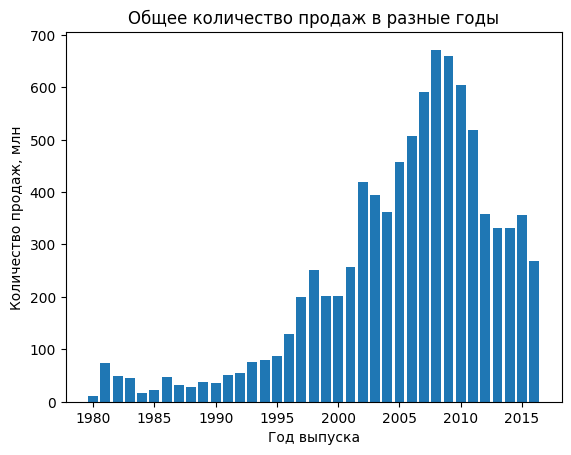

In [90]:
plt.bar(
    df['year'].value_counts().sort_values().index,
    df.groupby('year')['total_sales'].sum().sort_values()
)
plt.figsize=(15, 5)
plt.title('Общее количество продаж в разные годы')
plt.ylabel("Количество продаж, млн")
plt.xlabel("Год выпуска");

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

1. Общее количество выпущенных игр закономерно растает из года в год. Исключением стал 2012 год, когда количество новых игр упало в 2 раза и держится на одном уровне вплоть до 2016 года.


2. Количество новых игр в начале развития индустрии было очень мало. За 1980-1994 г. суммарно было выпущено 468 игр, что меньше за любой годовой период, начиная с 2001 года.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ продаж игр на разных платформах в разные годы

In [91]:
(
 df.pivot_table(index='platform',
               values='total_sales',
               aggfunc='count')
   .sort_values(by='total_sales', ascending=False)   
)

,total_sales
platform,
PS2,2127
DS,2121
PS3,1305
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


<div style="background-color: #CACACA; color:#000000; padding: 15px; border-radius: 10px;">      
Построим распределение продаж по годам для платформ, на которых можно было играть в минимум 800 различных игр.

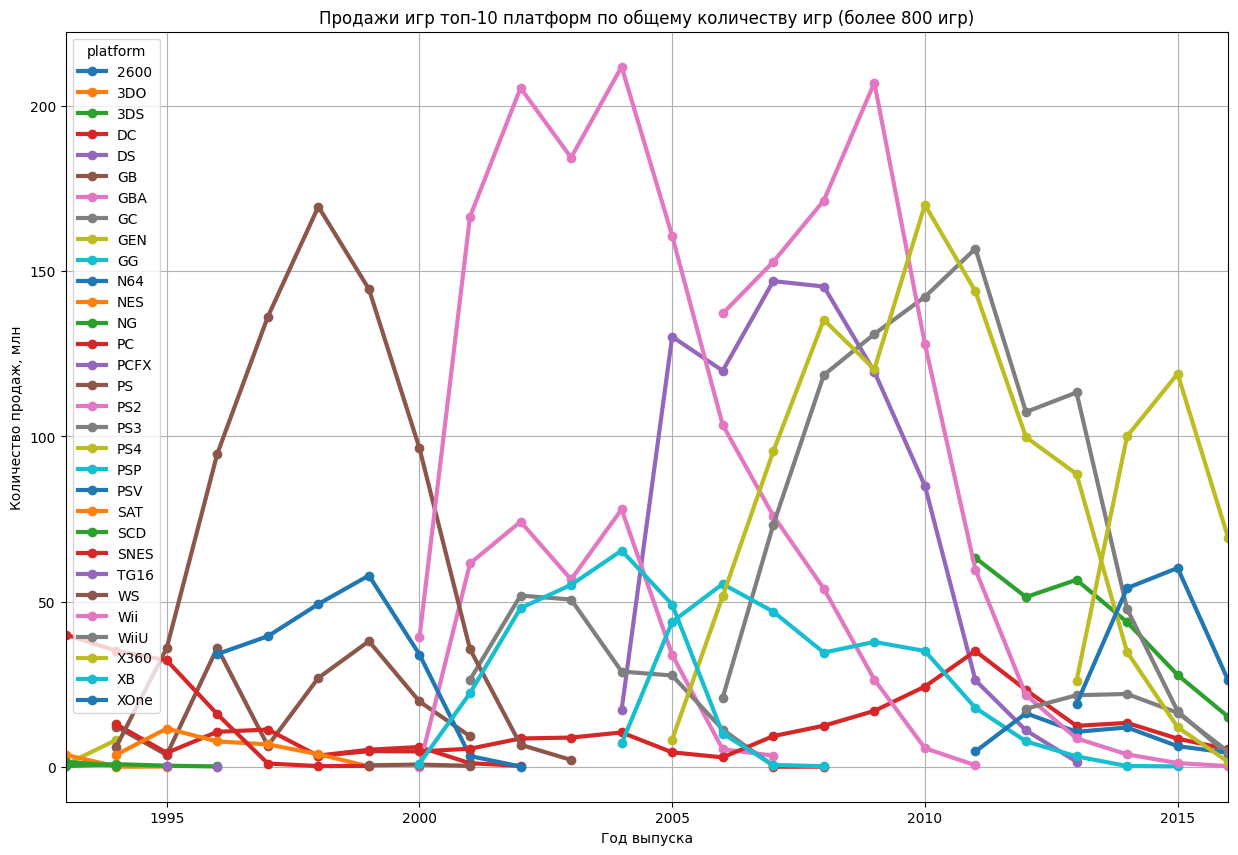

In [92]:
df_pivot = df.pivot_table(index='year',
                          columns='platform',
                          values='total_sales',
                          aggfunc='sum')

df_pivot.plot(figsize=(15,10),
                             marker='o',
                             markersize=6,
                             linewidth = 3,
                             xlim=(1993, 2016),
                             grid=True,
                             title='Продажи игр топ-10 платформ по общему количеству игр (более 800 игр)',
                             xlabel='Год выпуска',
                             ylabel='Количество продаж, млн');

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

1. Не все платформы одинаково популярны для выпуска игр: менее 100 игр выпустили сразу для 11 платформ. На самых популярных платформах можно играть более чем в 2000 разных игр.


2. Абсолютно все платформы имеют свой "цикл жизни": в течение первых 2-4 лет идет увеличение количества новых игр и увеличение продаж, после чего также в течение 2-4 лет количество падает. В определенный момент игры могут вовсе перестают выпускаться. Полный "цикл жизни" платформы в среднем составляет 10 лет. Исключение - универсальный **PC**: новые игры на него выпускаются с начала 1990-х годов по сей день.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Определение актуального периода для прогноза на 2017 год

<div class="alert alert-warning">
<b>Данные отражают не количество продаж по годам, а количество продаж для игр конкретного года выпуска. Например, все игры 2005 года платформы "XB" были проданы около 50 млн раз. Однако неизвестно, в какой год было продано больше, а в какой меньше. Поэтому далее будем считать, что пик продаж приходится на год релиза игры, а прогнозы делаются для новых игр.</div>

<div style="background-color: #CACACA; color:#000000; padding: 15px; border-radius: 10px;">   

Исходя из предыдущего анализа видно, что для большинства платформ игры больше не выпускаются. Популярные недавно платформы **DS** и **PSP** не имеют новых игр с 2013 и 2015 годов соответственно. В 2016 году новые игры появились только для четырех платформ: **PS3**, **X360**, **Wii** и **PC**.


Цикл жизни первых трех платформ подходит к концу, поэтому имеет смысл анализировать только последние 3 года. Для **PC** каждый год новые игры выпускаются приблизительно одинаково и продаются также, поэтому для этой платформы также можно рассмотреть последние 3 года.


Таким образом, получим новые данные, по которым можно будет составить прогноз на 2017 год.

In [93]:
df_relevant = df.query('year >= 2014').reset_index(drop=True)

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ продаж игр и потенциальной прибыли

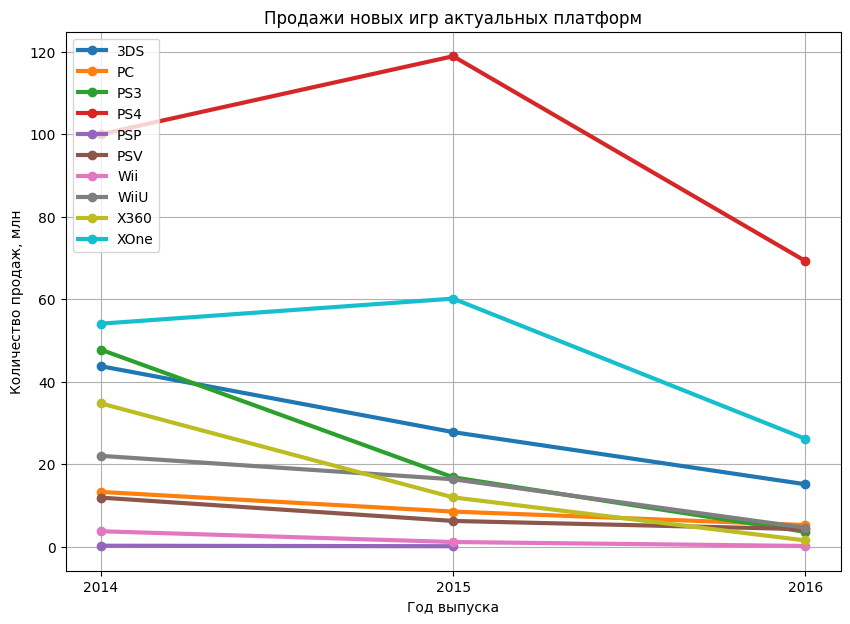

In [94]:
(
    df_relevant.pivot_table(
        index='year',
        columns='platform',
        values='total_sales',
        aggfunc='sum')
    .plot(
        figsize=(10, 7),
        marker='o',
        markersize=6,
        linewidth=3,
        grid=True,
        title='Продажи новых игр актуальных платформ',
        xlabel='Год выпуска',
        ylabel='Количество продаж, млн'
    )
);
x_ticks = [2014, 2015, 2016]
plt.xticks(ticks=x_ticks)
plt.legend(loc='upper left');

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

1. В 2017 году новые игры будут продаваться не более, чем для 9 платформ. В 2016 году лидирами стали платформы **PS4**, **XOne** и **3DS**.


2. Продажи новых игр в последние 3 года неуклонно падают. В 2016 году три лидирующие платформы имеют более 10 млн продаж.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ продаж игр на разных платформах в 2014-2016 годах

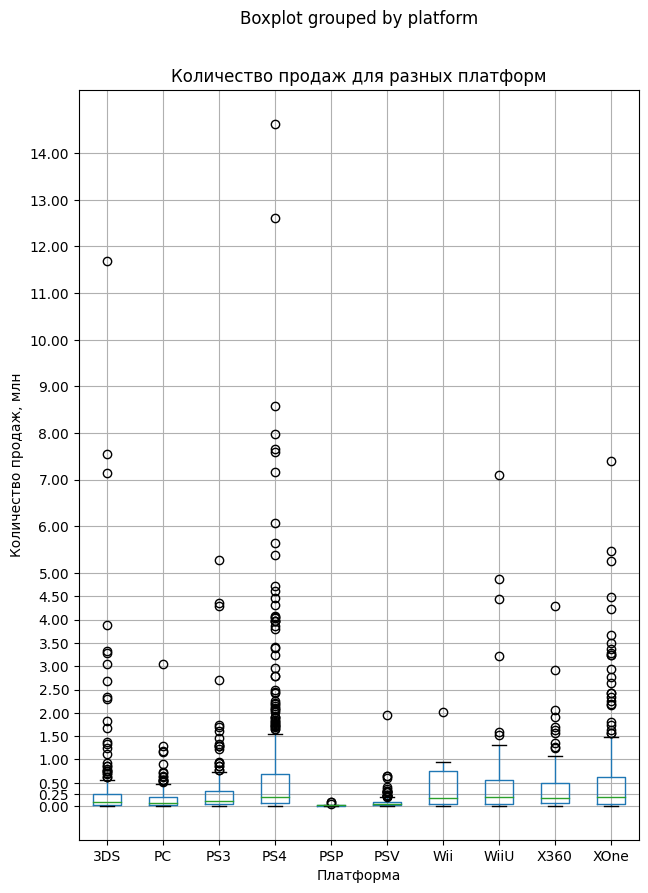

In [95]:
df_relevant.boxplot(column='total_sales',
                    by='platform',
                    figsize=(7,10))
plt.title('Количество продаж для разных платформ')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн');
y_ticks = [0, 0.25, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
plt.yticks(ticks=y_ticks);

<div style="background-color: #CACACA; color:#000000; padding: 15px; border-radius: 10px;">   
Посмотрим на график с диапазоном до 2 млн проданных игр, чтобы лучше оценит медианы и межквартильный размах.

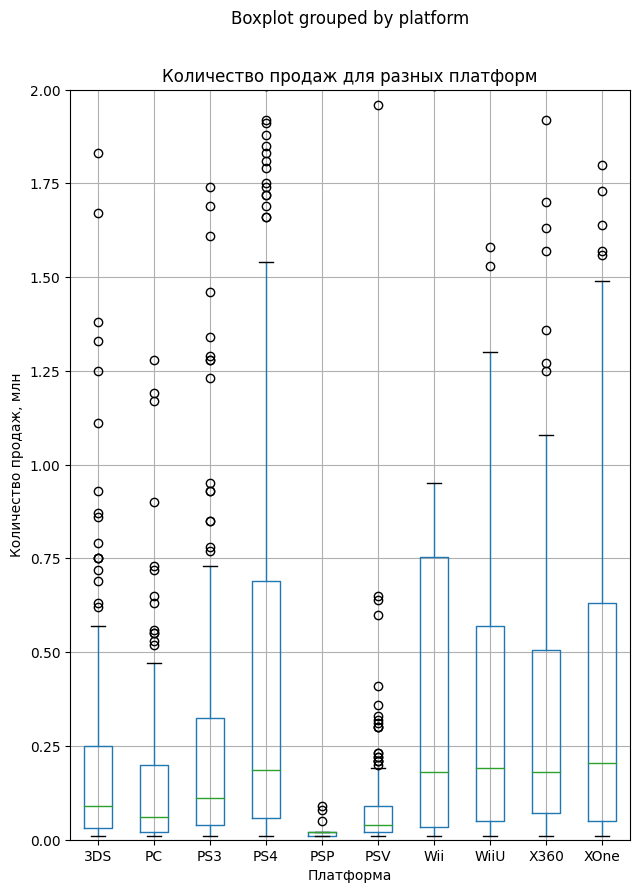

In [96]:
df_relevant.boxplot(column='total_sales',
                    by='platform',
                    figsize=(7,10))
plt.title('Количество продаж для разных платформ')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн')
plt.ylim(0, 2)
plt.show()

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

1. Медианные значения продаж всех платформ находятся на уровне менее 250 тысяч. Большинство платформ имеют многочисленные выбросы: показатели продаж отдельной игры могу превышать средние значения в десятки раз. 


2. Данная диаграмма подтверждает предыдущее заключение: платформы **PS4**, **XOne** и **3DS** выглядят ниаболее перспктивными для продаж. У них самый большой межквартильный размах, а также больше количество выбросов, превышающих средние значения. Также высокая медиана и хороший межквартильный размах у платформ **Wii** и **WiiU**.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ корреляции продаж и оценок пользователей / критиков

In [97]:
# учтем пустые значения в столбцах
df_relevant_score = df_relevant.query('~(user_score.isna()) and ~(critic_score.isna())')

In [98]:
df_relevant_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 1 to 1682
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          704 non-null    object 
 1   platform      704 non-null    object 
 2   year          704 non-null    int32  
 3   genre         704 non-null    object 
 4   na_sales      704 non-null    float32
 5   eu_sales      704 non-null    float32
 6   jp_sales      704 non-null    float32
 7   other_sales   704 non-null    float32
 8   total_sales   704 non-null    float64
 9   critic_score  704 non-null    float64
 10  user_score    704 non-null    float64
 11  esrb_rating   704 non-null    object 
dtypes: float32(4), float64(3), int32(1), object(4)
memory usage: 57.8+ KB


<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### Платформа ``PS4``

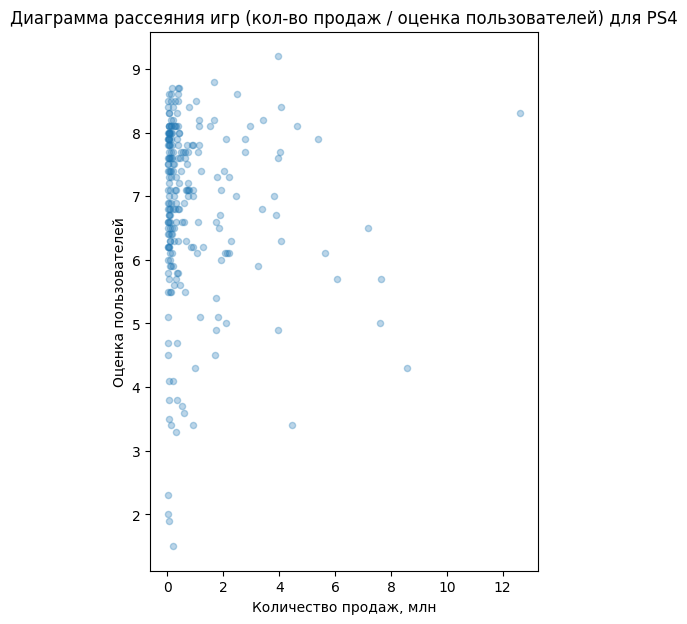

In [99]:
# диаграмма рассеяния для оценки пользователей
df_relevant_score[df_relevant_score['platform'] == 'PS4'].plot(x='total_sales',
                                                   y='user_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 7),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка пользователей) для PS4',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка пользователей');

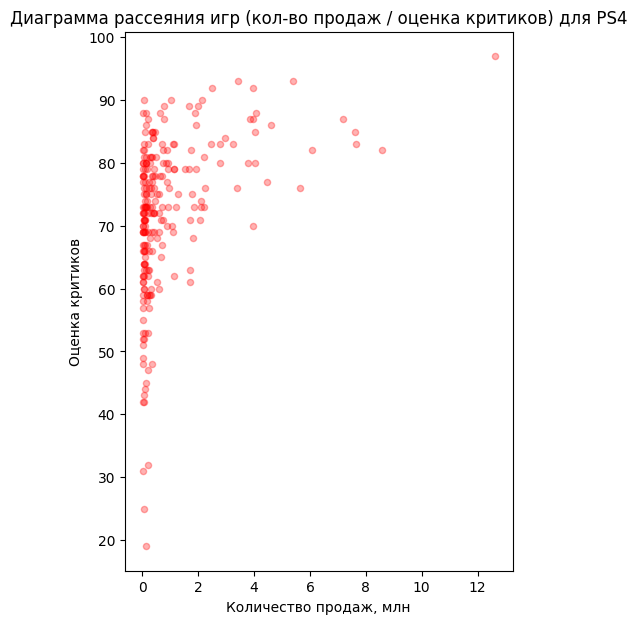

In [100]:
# диаграмма рассеяния для оценки критиков
df_relevant_score[df_relevant_score['platform'] == 'PS4'].plot(x='total_sales',
                                                   y='critic_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 7),
                                                   color='r', 
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка критиков) для PS4',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка критиков');

In [101]:
# корреляция продаж / оценки пользователей
df_relevant_score.query('platform == "PS4"')['total_sales'].corr(df_relevant['user_score'])

-0.0431858599719363

In [102]:
# корреляция продаж / оценки критиков
df_relevant_score.query('platform == "PS4"')['total_sales'].corr(df_relevant['critic_score'])

0.4019028781147529

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### Платформа ``XOne``

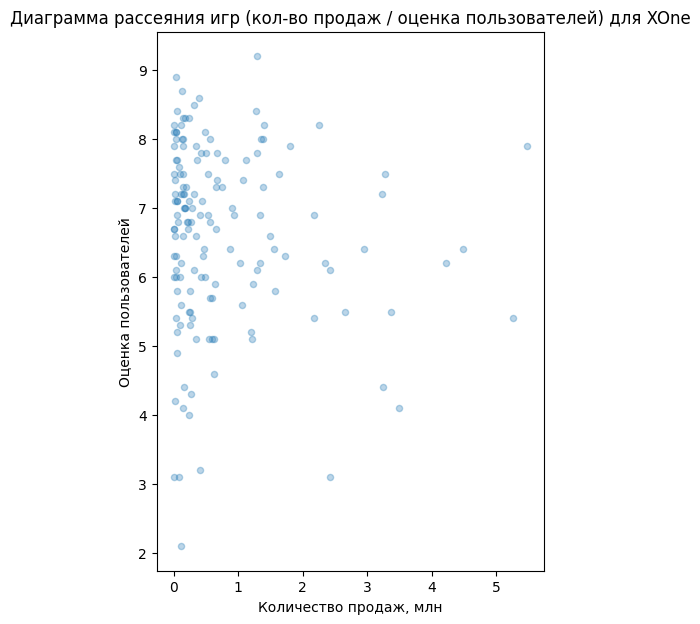

In [103]:
# диаграмма рассеяния для оценки пользователей
df_relevant_score[df_relevant_score['platform'] == 'XOne'].plot(x='total_sales',
                                                   y='user_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 7),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка пользователей) для XOne',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка пользователей');

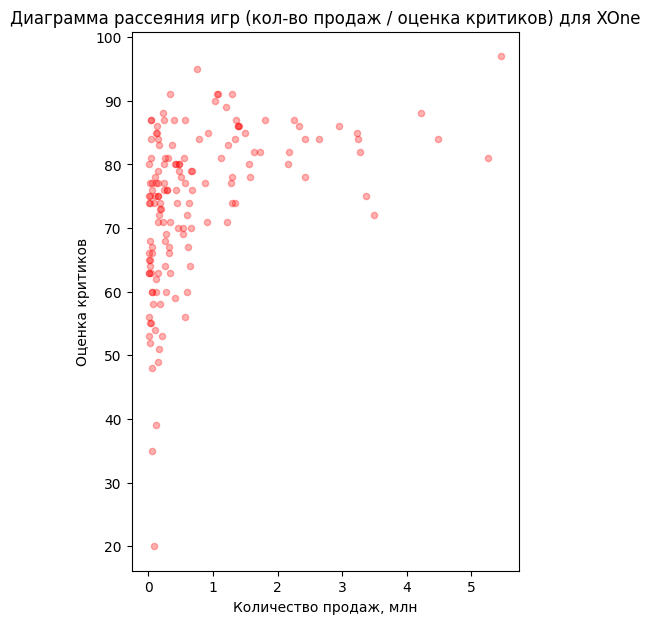

In [104]:
# диаграмма рассеяния для оценки критиков
df_relevant_score[df_relevant_score['platform'] == 'XOne'].plot(x='total_sales',
                                                   y='critic_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 7),
                                                   color='r',             
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка критиков) для XOne',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка критиков');

In [105]:
# корреляция продаж / оценки пользователей
df_relevant_score.query('platform == "XOne"')['total_sales'].corr(df_relevant['user_score'])

-0.09173434503310748

In [106]:
# корреляция продаж / оценки критиков
df_relevant_score.query('platform == "XOne"')['total_sales'].corr(df_relevant['critic_score'])

0.4221118510555763

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### Платформа ``3DS``

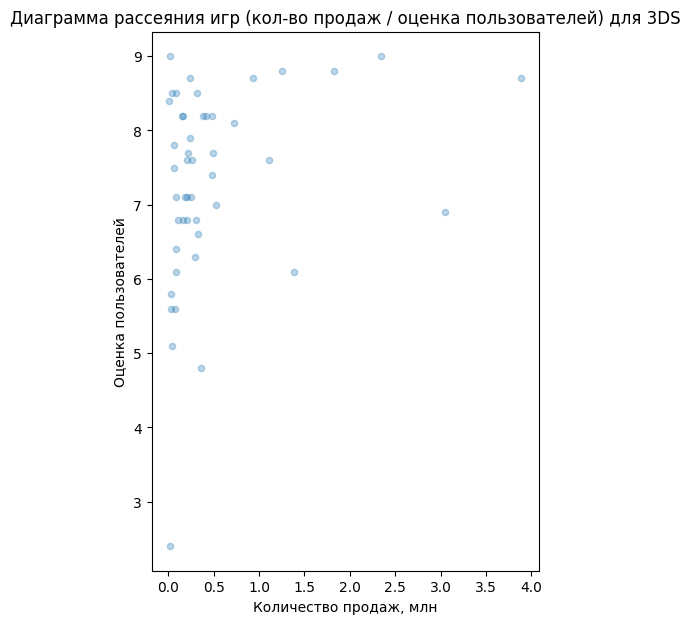

In [107]:
# диаграмма рассеяния для оценки пользователей
df_relevant_score[df_relevant_score['platform'] == '3DS'].plot(x='total_sales',
                                                   y='user_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 7),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка пользователей) для 3DS',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка пользователей');

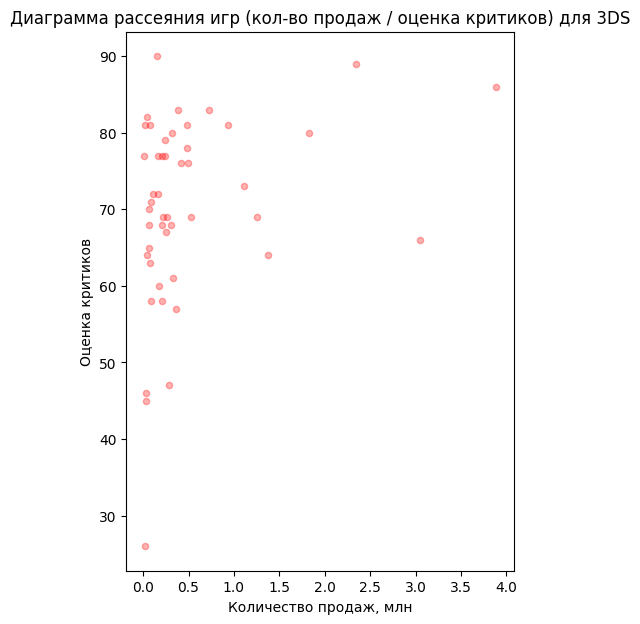

In [108]:
# диаграмма рассеяния для оценки критиков
df_relevant_score[df_relevant_score['platform'] == '3DS'].plot(x='total_sales',
                                                   y='critic_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 7),
                                                   color='r',             
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка критиков) для 3DS',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка критиков');

In [109]:
# корреляция продаж / оценки пользователей
df_relevant_score.query('platform == "3DS"')['total_sales'].corr(df_relevant['user_score'])

0.2798498792503281

In [110]:
# корреляция продаж / оценки критиков
df_relevant_score.query('platform == "3DS"')['total_sales'].corr(df_relevant['critic_score'])

0.28468579095782925

<div style="border:solid yellow 3px; padding: 20px; border-radius: 10px">
    
#### Платформа ``PC``

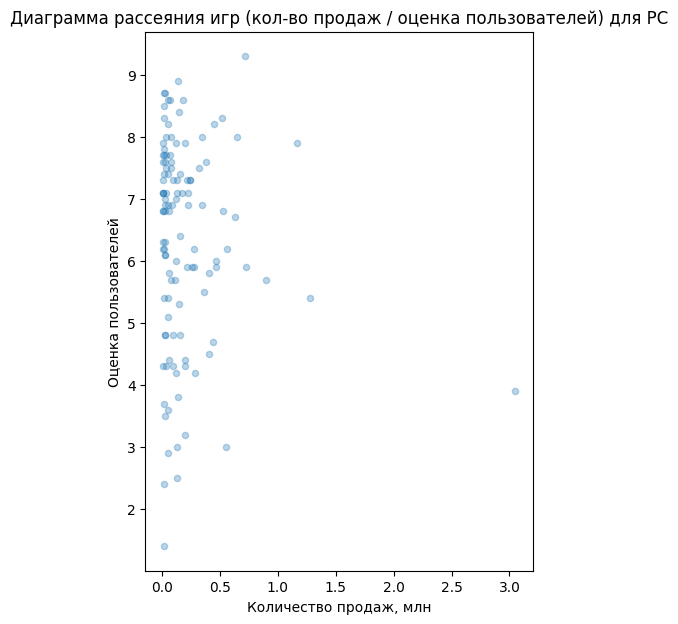

In [111]:
# диаграмма рассеяния для оценки пользователей
df_relevant_score[df_relevant_score['platform'] == 'PC'].plot(x='total_sales',
                                                   y='user_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 7),
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка пользователей) для PC',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка пользователей');

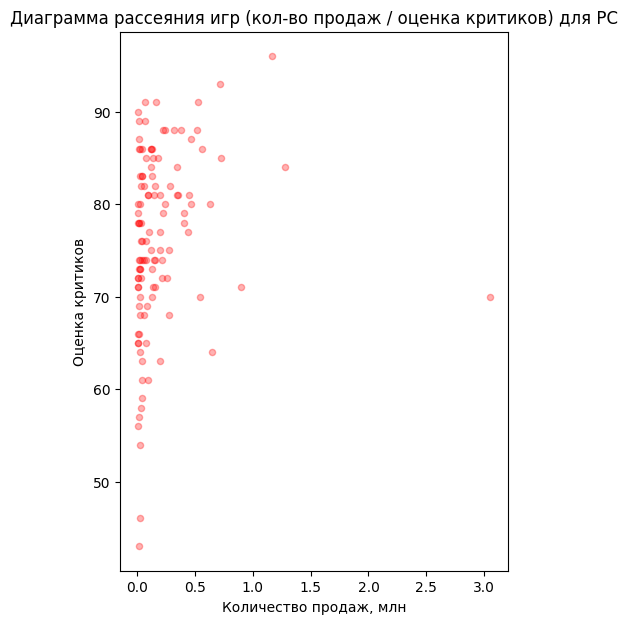

In [112]:
# диаграмма рассеяния для оценки критиков
df_relevant_score[df_relevant_score['platform'] == 'PC'].plot(x='total_sales',
                                                   y='critic_score',
                                                   kind='scatter',
                                                   alpha=0.3,
                                                   figsize=(5, 7),
                                                   color='r',            
                                                   title='Диаграмма рассеяния игр (кол-во продаж / оценка критиков) для PC',
                                                   xlabel='Количество продаж, млн',
                                                   ylabel='Оценка критиков');

In [113]:
# корреляция продаж / оценки пользователей
df_relevant_score.query('platform == "PC"')['total_sales'].corr(df_relevant['user_score'])

-0.08997391228554938

In [114]:
# корреляция продаж / оценки критиков
df_relevant_score.query('platform == "PC"')['total_sales'].corr(df_relevant['critic_score'])

0.17206091490145103

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

Для четырех самых популярных за последние 3 года платформ выявлены закономерности:
    
1. Корреляция между количеством продаж и оценкой пользователей - слабая (-0.04, -0.09, 0.28 и -0.09). Это говорит о том, что чаще всего связи между ними нет. Возможно, люди заранее выбирают те игры, которые им могут понравиться, и ставят хорошие оценки, но не обязательно покупают самые продающиеся варианты.


2. Корреляция между количеством продаж и оценкой критиков - всегда положительная и сильнее, чем у оценки пользователей (0.40, 0.42, 0.28 и 0.17). Это говорит о том, что критики чаще положительно оценивают те игры, которые хорошо продаются, или, наоборот, хорошо продаются те игры, которые хорошо оцениваются критиками. Однако связь недостаточно сильная, чтобы точно полагаться на оценку критиков при планировании продаж.
    
    
3. Платформа `3DS` имеет игры, которые одинаково оцениваются как критиками, так и пользователями, но связь недостаточно сильная. Для остальных платформ полагаться на оценку критиков стоит чаще, чем на оценку пользователей.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ продаж игр в зависимости от жанра

In [115]:
df_relevant.groupby('genre')['total_sales'].sum().sort_values()

genre
Puzzle            2.21
Strategy          3.96
Simulation       13.13
Adventure        17.55
Platform         18.09
Racing           27.52
Fighting         28.22
Misc             37.55
Role-Playing    101.44
Sports          109.48
Shooter         170.94
Action          199.36
Name: total_sales, dtype: float64

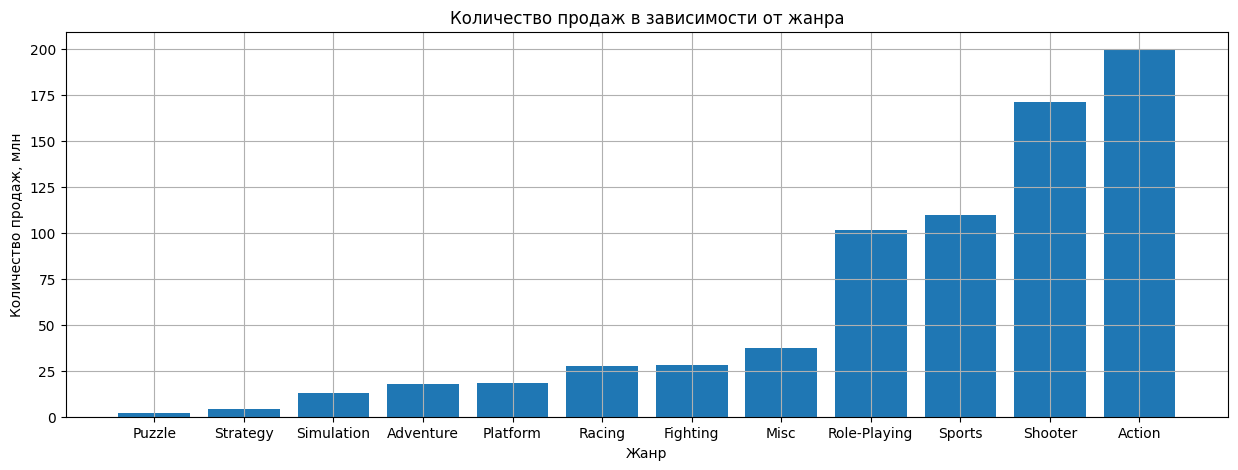

In [116]:
plt.figure(figsize=(15, 5))

plt.bar(
    df_relevant.groupby('genre')['total_sales'].sum().sort_values().index,
    df_relevant.groupby('genre')['total_sales'].sum().sort_values()
)
plt.title('Количество продаж в зависимости от жанра')
plt.grid(True)
plt.xlabel("Жанр")
plt.ylabel("Количество продаж, млн");

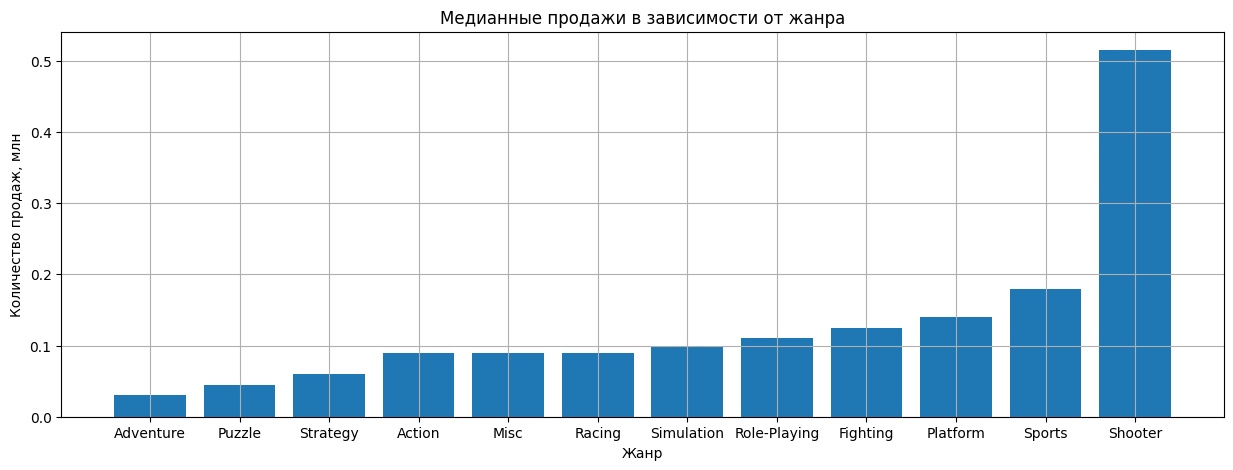

In [117]:
plt.figure(figsize=(15, 5))

plt.bar(
    df_relevant.groupby('genre')['total_sales'].median().sort_values().index,
    df_relevant.groupby('genre')['total_sales'].median().sort_values()
)
plt.title('Медианные продажи в зависимости от жанра')
plt.grid(True)
plt.xlabel("Жанр")
plt.ylabel("Количество продаж, млн");

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

1. Общее количество продаж неравномерно распределено по жанрам:
- топ-3 самых продающихся: **Action** (199.36 млн), **Shooter** (170.94 млн) и **Sports** (109.48 млн)
- худшие по продажам: **Puzzle** (2.21 млн) и **Strategy** (3.96 млн)

   
2. Самый прибыльный жанр можно определить не только по общему количеству продаж, но и по медианному значению продажи для одной игры. В этом случае ситуация меняется:
- на перврое место с большим отрывом выходит жанр **Shooter**
- далее идет плавное снижение по все жанрам (**Sports** сохраняет лидирующие позиции, а **Action** теряет их)
- **Puzzle** и **Strategy** по-прежнему составляют тройку худших по продажам

In [118]:
df_relevant.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

<div style="background-color: #4BAB68; color:#000000; padding: 15px; border-radius: 10px;">

### Вывод

1. В начале развития индустрии новых игр было очень мало (до 1994 года выпускалось менее 100 игр в год). Далее последовал скачок, и с каждым годом игр становилось на порядок больше. Максимум новых игр зафиксировано в 2009 году (1426), после чего уровень постепенно уменьшается и составляет 502 игры в 2016 году.


2. Абсолютно все платформы имеют свой "цикл жизни" (в среднем 10 лет): сначала новых игр выходит больше, затем количество снижается, и далее новые игры не выходят. Исключение - универсальный **PC**: игры на него выпускаются каждый год.


3. За основу прогноза взяты данные трех последних лет по 10 плафтормам, новые игры на которые по-прежнему выпускаются: **PS4**, **3DS**, **XOne**, **WiiU**, **PS3**, **X360**, **PC**, **Wii**, **PSV** и **PSP**.


4. Продажи новых игр в последние 3 года неуклонно падают. В 2016 году три лидирующие платформы (**PS4**, **3DS**, **XOne**) имеют более 10 млн продаж.


5. Медианные значения продаж всех платформ находятся на уровне 250 тысяч. Медианные значения продаж также подтверждают вывод о том, что самые популярные платформы - это **PS4**, **3DS**, **XOne**.


6. Корреляция между количеством продаж и оценкой пользователей - слабая, однако для оценки критиков ситуация лучше: последние чаще положительно оценивают те игры, которые будут хорошо продаваться, или, наоборот, хорошо продаются те игры, которые хорошо оцениваются критиками.


7. Топ-3 самых продающихся жанров за последние 3 года: **Action** (199.36 млн), **Shooter** (170.94 млн) и **Sports** (109.48 млн). Хуже всего продаются: **Puzzle** (2.21 млн) и **Strategy** (3.96 млн).
    
    
8. Самый прибыльный жанр по среднему количеству продаж на игру - **Shooter** (более чем в 2 раза, чем любой другой жанр). Худшие жанры по этому показателю прежние: **Puzzle** и **Strategy**.

<div style="background-color: #FFE500; color:#000000; padding: 15px; border-radius: 10px;">

## Составление портрета пользователя каждого региона

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Самые популярные платформы по регионам

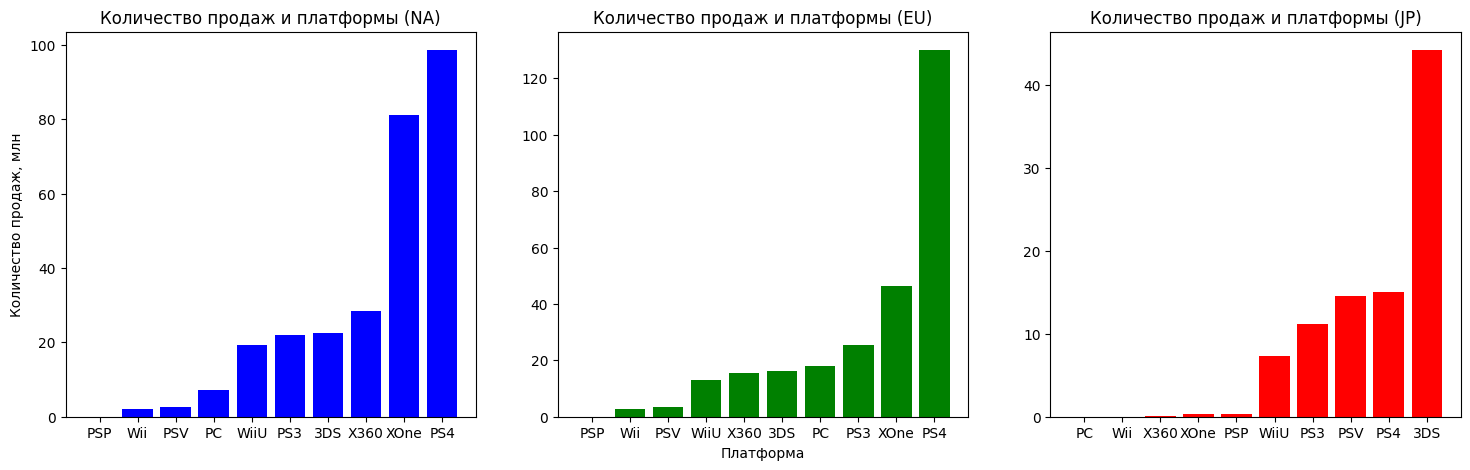

In [119]:
# создадим одну фигуру для трех столбчатых диаграмм
plt.figure(figsize=(18, 5))

# диаграмма для NA
plt.subplot(131)
plt.bar(
    df_relevant.groupby('platform')['na_sales'].sum().sort_values().index,
    df_relevant.groupby('platform')['na_sales'].sum().sort_values(),
    color='b'
)
plt.title('Количество продаж и платформы (NA)')
plt.ylabel("Количество продаж, млн")

# диаграмма для EU
plt.subplot(132)
plt.bar(
    df_relevant.groupby('platform')['eu_sales'].sum().sort_values().index,
    df_relevant.groupby('platform')['eu_sales'].sum().sort_values(),
    color='g'
)
plt.title('Количество продаж и платформы (EU)')
plt.xlabel("Платформа")

# диаграмма для JP
plt.subplot(133)
plt.bar(
    df_relevant.groupby('platform')['jp_sales'].sum().sort_values().index,
    df_relevant.groupby('platform')['jp_sales'].sum().sort_values(),
        color='r'
)
plt.title('Количество продаж и платформы (JP)')

plt.show()

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

1. В регионе NA продажи сильно зависят от платформы: заметно лучше продаются игры для **PS4** (100 млн) и **XOne** (80 млн), плохо - для **PSP** (менее 1 млн). Топ-5: **PS4**, **XOne**, **X360**, **3DS**, **PS3**.


2. В регионе EU есть ситуация схожая: отличие лишь в том, что отрыв **PS4** от **XOne** более, чем в  2 раза. Топ-5: **PS4**, **XOne**, **PS3**, **PC**, **3DS**.


3. В регионе JP лидер продаж - **3DS** (более 40 млн). Далее идут 4 платформы со приблизительно равным числом продаж: **PS4**, **PSV**, **PS3** и **WiiU** (8-15 млн). Все остальные платформы имеют минимум продаж.
    
    
4. Таким образом видно, что рынок для NA и EU в целом схож. В регионе JP картина сильно отличается.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Самые популярные жанры по регионам

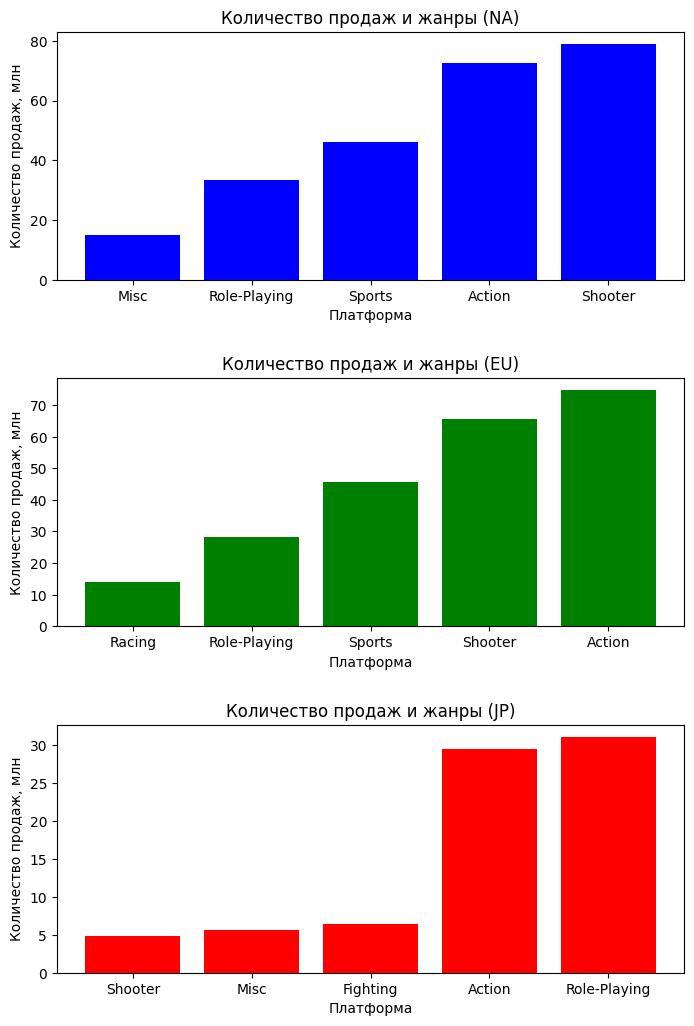

In [120]:
# создадим одну фигуру для трех столбчатых диаграмм другим способом
f, ax = plt.subplots(3, 1, figsize=(7, 10))
f.tight_layout(h_pad=5)

# диаграмма для NA
ax[0].bar(
    df_relevant.groupby('genre')['na_sales'].sum().sort_values().tail().index,
    df_relevant.groupby('genre')['na_sales'].sum().sort_values().tail(),
    color='b'
)
ax[0].set_xlabel('Платформа')
ax[0].set_ylabel('Количество продаж, млн')
ax[0].set_title('Количество продаж и жанры (NA)')

# диаграмма для EU
ax[1].bar(
    df_relevant.groupby('genre')['eu_sales'].sum().sort_values().tail().index,
    df_relevant.groupby('genre')['eu_sales'].sum().sort_values().tail(),
    color='g'
)
ax[1].set_xlabel('Платформа')
ax[1].set_ylabel('Количество продаж, млн')
ax[1].set_title('Количество продаж и жанры (EU)')

# диаграмма для JP
ax[2].bar(
    df_relevant.groupby('genre')['jp_sales'].sum().sort_values().tail().index,
    df_relevant.groupby('genre')['jp_sales'].sum().sort_values().tail(),
    color='r'
)
ax[2].set_xlabel('Платформа')
ax[2].set_ylabel('Количество продаж, млн')
ax[2].set_title('Количество продаж и жанры (JP)')
pass

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

Общая картина распределения глобальных продаж по жанрам повторяется для NA и EU:
    
1. ТОП-5 в регионе NA: **Shooter**, **Action**, **Sports**, **Role-Playing**, **Misc**.
    
    
2. ТОП-5 в регионе EU: **Action**, **Shooter**, **Sports**, **Role-Playing**, **Racing**.
    

В регионе JP картина отличается: лидеры с большим отрывом - это жанры **Role-Playing** и **Action**.
    
3. ТОП-5 в регионе JP: **Role-Playing**, **Action**, **Fighting**, **Misc**, **Shooter**.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Анализ влияния рейтинга ESRB на продажи по регионам

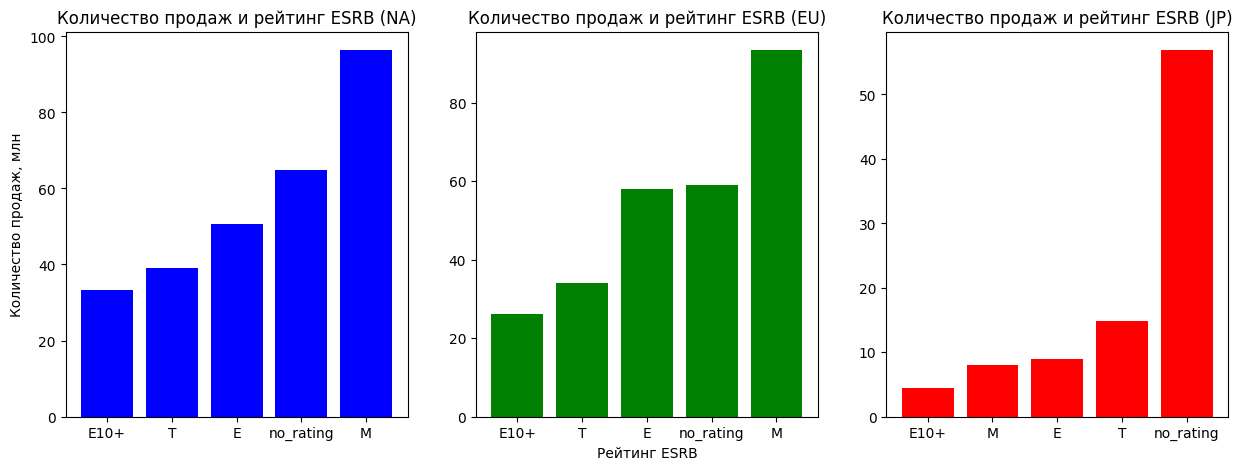

In [121]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(
    df_relevant.groupby('esrb_rating')['na_sales'].sum().sort_values().index,
    df_relevant.groupby('esrb_rating')['na_sales'].sum().sort_values(),
    color='b'
)
plt.title('Количество продаж и рейтинг ESRB (NA)')

plt.ylabel("Количество продаж, млн")

plt.subplot(132)
plt.bar(
    df_relevant.groupby('esrb_rating')['eu_sales'].sum().sort_values().index,
    df_relevant.groupby('esrb_rating')['eu_sales'].sum().sort_values(),
    color='g'
)
plt.title('Количество продаж и рейтинг ESRB (EU)')
plt.xlabel("Рейтинг ESRB")

plt.subplot(133)
plt.bar(
    df_relevant.groupby('esrb_rating')['jp_sales'].sum().sort_values().index,
    df_relevant.groupby('esrb_rating')['jp_sales'].sum().sort_values(),
    color='r'
)
plt.title('Количество продаж и рейтинг ESRB (JP)')

plt.show()

<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

1. В NA и EU больше всего игр выходит для взрослых. На втором меcте онлайн-игры без указания рейтинга. Далее идут игры для любого возраста и подростков (13 лет и более)
    
    
2. Самые большие отличия в продажах по рейтингу - для региона JP. Здесь со значительным лидерством преобладают продажи онлайн-игр. Игры для подростков больше, чем для взрослых.
    
    
3. В JP, вероятно, существует свой внутренний национальный рейтинг.

<div style="background-color: #4BAB68; color:#000000; padding: 15px; border-radius: 10px;">

### Вывод

Портрет пользователя в регионе NA выглядит следующим образом:
- вероятнее всего приобретет игру на платформе **PS4** или **XOne**
- предпочитает жанры **Shooter**, **Action** и **Sports**
- приобретет игру для взрослых или онлайн-игру


Портрет пользователя в регионе EU выглядит следующим образом:
- вероятнее всего приобретет игру на платформе **PS4** или **XOne**
- предпочитает жанры **Action**, **Shooter** и **Sports**
- приобретет игру для взрослых или онлайн-игру


Портрет пользователя в регионе JP выглядит следующим образом:
- вероятнее всего приобретет игру на платформе **3DS**
- предпочитает жанры **Role-Playing** и **Action**
- приобретет онлайн-игру или игру для подростков
    
    
В JP, вероятно, существует свой внутренний национальный рейтинг.

<div style="background-color: #FFE500; color:#000000; padding: 15px; border-radius: 10px;">

## Проверка гипотез

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Проверка гипотезы: средние пользовательские рейтинги платформ XOne и PC - одинаковые

In [124]:
# для выдвижения гипотез посмотрим среднее значение для двух платформ
# используем переменную df_relevant_score, которая не содержит пропущенных значений
df_xone_user_score = df_relevant_score.query('platform == "XOne"')['user_score']
display(df_xone_user_score.mean())

df_pc_user_score = df_relevant_score.query('platform == "PC"')['user_score']
df_pc_user_score.mean()

6.620529801324504

6.3417391304347825

<div style="background-color: #CACACA; color:#000000; padding: 15px; border-radius: 10px;">   

**Нулевая гипотеза**: средний пользовательский рейтинг платформы **XOne** `равен` аналогичному рейтингу платформы **PC**.

**Альтернативная гипотеза**: средний пользовательский рейтинг платформы **XOne** `не равен` аналогичному рейтингу платформы **PC**.

In [78]:
alpha = 0.05

result = st.ttest_ind(df_xone_user_score, df_pc_user_score)

print('P-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 0.12817793652639856
Не получилось отвергнуть нулевую гипотезу


<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

Нулевая гипотеза подтвердилась: вероятнее всего средний пользовательский рейтинг платформы **XOne** `равен` аналогичному рейтингу платформы **PC**.

<div style="background-color: #FFF496; color:#000000; padding: 15px; border-radius: 10px;">

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports - разные

In [125]:
# для выдвижения гипотез посмотрим среднее значение для двух жанров
# используем переменную df_relevant_score, которая не содержит пропущенных значений
df_action_user_score = df_relevant_score.query('genre == "Action"')['user_score']
display(df_action_user_score.mean())

df_sports_user_score = df_relevant_score.query('genre == "Sports"')['user_score']
df_sports_user_score.mean()

6.832599118942731

5.68433734939759

<div style="background-color: #CACACA; color:#000000; padding: 15px; border-radius: 10px;">   

**Нулевая гипотеза**: средний пользовательский рейтинг жанра **Action** `равен` аналогичному рейтингу жанра **Sports**.

**Альтернативная гипотеза**: средний пользовательский рейтинг жанра **Action** `больше` аналогичного рейтинга жанра **Sports**.

In [81]:
result = st.ttest_ind(df_action_user_score, df_sports_user_score, alternative='greater')

print('P-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 2.0270447999971618e-10
Отвергаем нулевую гипотезу


<div style="background-color: #92D4A6; color:#000000; padding: 15px; border-radius: 10px;">

#### Промежуточный вывод

Нулевая гипотеза отвергнута: есть основания говорить, что средний пользовательский рейтинг жанра **Action** `больше` аналогичного рейтинга жанра **Sports**.

<div style="background-color: #FFE500; color:#000000; padding: 15px; border-radius: 10px;">

## Подведение итогов

<div style="background-color: #4BAB68; color:#000000; padding: 15px; border-radius: 10px;">

1. Изначальные данные содержат 11435 игр, выпущенных с 1980 года по 2016 год и представленных в 12 жанрах. Игры могут быть представлены в 10 и более вариантах в зависимости от платформы и года выпуска. Данные нуждались в объемной предобработке.


3. После предобработки удалено 1.6% строк с отсутствующей информацией о дате выпуска. Пропущено около 50% информации об оценке пользователей и критиков, анализ проводился по имеющимся данным.


4. Данные отражают не количество продаж по годам, а количество продаж для игр конкретного года выпуска. Поэтому в ходе исследования было принято допущение, что пик продаж приходится на год релиза игры, а прогнозы делаются для новых игр.


5. Количество выпущенных игр с каждым годом увеличивалось с максимумом в 2009 году (1426 новых игр), что связано как с увеличением продаж, так и с созданием новых платформ и перевыпуском уже существующих игр. Абсолютно все платформы имеют свой "цикл жизни" в среднем 10 лет, за исключением универсального **PC**. В последний год было выпущено 502 новые игры.


6. На основе данных за последние 3 года были проанализированы все 10 платформ (**PS4**, **3DS**, **XOne**, **WiiU**, **PS3**, **X360**, **PC**, **Wii**, **PSV** и **PSP**), для которых еще выпускаются игры. Продажи новых игр в последние 3 года неуклонно падают. В 2016 году три лидирующие платформы (**PS4**, **3DS**, **XOne**) имеют более 10 млн продаж. Медианное значение продаж каждой платформы находится на уровне 250 тысяч копий в год.


7. Корреляция между количеством продаж и оценкой пользователей практически отсутствует, для критиков ситуация лучше: они чаще положительно оценивают те игры, которые будут хорошо продаваться. Топ-3 самых продающихся жанров за последние 3 года: **Action** (199.36 млн), **Shooter** (170.94 млн) и **Sports** (109.48 млн), а самый прибыльный жанр по среднему количеству продаж на игру - **Shooter**. Хуже всего продаются: **Puzzle** (2.21 млн) и **Strategy** (3.96 млн).
***

8. Портрет пользователя в регионе (NA) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **PS4** или **XOne**
    - предпочитает жанры **Shooter**, **Action** и **Sports**
    - приобретет игру для взрослых или онлайн-игру


9. Портрет пользователя в регионе (EU) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **PS4** или **XOne**
    - предпочитает жанры **Action**, **Shooter** и **Sports**
    - приобретет игру для взрослых или онлайн-игру


10. Портрет пользователя в регионе (JP) выглядит следующим образом:
    - вероятнее всего приобретет игру на платформе **3DS**
    - предпочитает жанры **Role-Playing** и **Action**
    - приобретет онлайн-игру или игру для подростков (В JP, вероятно, существует свой внутренний национальный рейтинг)
 ***
    
11. Проверены две важные гипотезы. Вероятнее всего средний пользовательский рейтинг платформы **XOne** `равен` аналогичному рейтингу платформы **PC**. Также есть основания говорить, что средний пользовательский рейтинг жанра **Action** `больше` аналогичного рейтинга жанра **Sports**.

<div style="background-color: #FFE500; color:#000000; padding: 15px; border-radius: 10px;">

## Рекомендации

<div style="border:solid green 3px; padding: 20px; border-radius: 10px">

<b>В 2017 году будет выгодно продавать новые игры со следующими характеристиками:</b>

- для платформ **PS4** и **XOne** в регионах EU / NA и только для **3DS** в регионе JP
 - для любителей жанров **Shooter**, **Action**, **Sports** в регионах EU / NA и **Role-Playing**, **Action** в регионе JP
 - для совершеннолетних любителей онлайн-игр (без рейтинга ESRB) вне зависимости от региона, а также для совершеннолетних в регионах EU / NA и для подростков в регионе JP
 - для платформы **XOne** в силу статистически равного пользовательского рейтинга c самой стабильной платформой **PC**
 - для любителей жанра **Action** в силу статистически большего пользовательского рейтинга другого популярного жанра **Sports**
 - с хорошей оценкой критиков для определения уровня продаж в качестве дополнительного критерия</div>